In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel 
from skimage.feature._canny import canny
from skimage.color import rgb2gray
from skimage.restoration import denoise_bilateral, denoise_tv_chambolle
from skimage.transform import resize
from sklearn.cluster import KMeans

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

%matplotlib inline


In [2]:
!ls

3_29_2021_dry_run_1.ipynb  3_30_2021_dry_run.ipynb  train.csv
3_29_2021_dry_run.ipynb    3_31_2021_dry_run.ipynb


In [3]:
df_index=pd.read_csv('train.csv')
df_index

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো
...,...,...,...,...,...
200835,Train_200835,22,7,2,র্খে
200836,Train_200836,65,9,0,ত্তো
200837,Train_200837,2,1,4,অ্যা
200838,Train_200838,152,9,0,স্নো


In [4]:
df_index.shape

(200840, 5)

<AxesSubplot:>

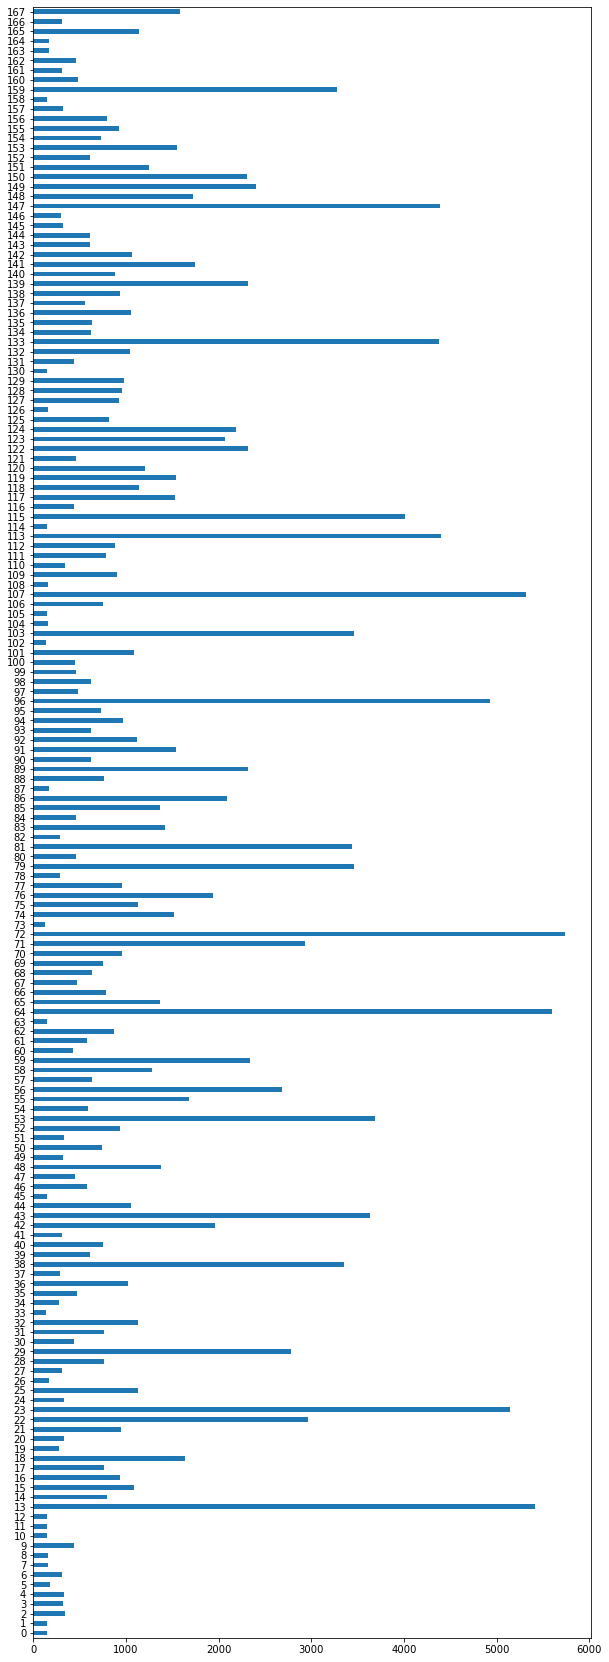

In [5]:
plt.figure(figsize=(10,30))
df_index['grapheme_root'].value_counts().sort_index().plot.barh()  

<AxesSubplot:>

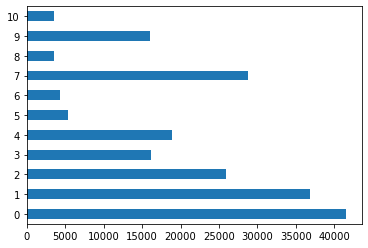

In [6]:
df_index['vowel_diacritic'].value_counts().sort_index().plot.barh()  

<AxesSubplot:>

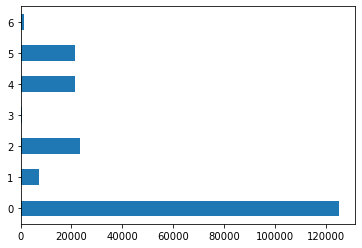

In [7]:
df_index['consonant_diacritic'].value_counts().sort_index().plot.barh()  

In [8]:
df_index['image_id']=df_index['image_id']+'.jpg'

In [9]:
df_index

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0.jpg,15,9,5,ক্ট্রো
1,Train_1.jpg,159,0,0,হ
2,Train_2.jpg,22,3,5,খ্রী
3,Train_3.jpg,53,2,2,র্টি
4,Train_4.jpg,71,9,5,থ্রো
...,...,...,...,...,...
200835,Train_200835.jpg,22,7,2,র্খে
200836,Train_200836.jpg,65,9,0,ত্তো
200837,Train_200837.jpg,2,1,4,অ্যা
200838,Train_200838.jpg,152,9,0,স্নো


In [10]:
df_index['consonant_diacritic'].value_counts() 
#7 values , # 7 columns one hot coding, output = 7 colums and softmax

0    125278
2     23465
5     21397
4     21270
1      7424
6      1387
3       619
Name: consonant_diacritic, dtype: int64

In [11]:
df_index.dtypes

image_id               object
grapheme_root           int64
vowel_diacritic         int64
consonant_diacritic     int64
grapheme               object
dtype: object

In [12]:
!pwd

/home/beth/Galvanize/capstone/capstone_2/src


In [13]:
df_index_1 = df_index.iloc[:44597,:]

In [14]:
df_index_1

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0.jpg,15,9,5,ক্ট্রো
1,Train_1.jpg,159,0,0,হ
2,Train_2.jpg,22,3,5,খ্রী
3,Train_3.jpg,53,2,2,র্টি
4,Train_4.jpg,71,9,5,থ্রো
...,...,...,...,...,...
44592,Train_44592.jpg,78,1,0,দ্মা
44593,Train_44593.jpg,86,2,0,ন্তি
44594,Train_44594.jpg,140,0,0,ষ্ক
44595,Train_44595.jpg,18,9,0,ক্ষো


<AxesSubplot:>

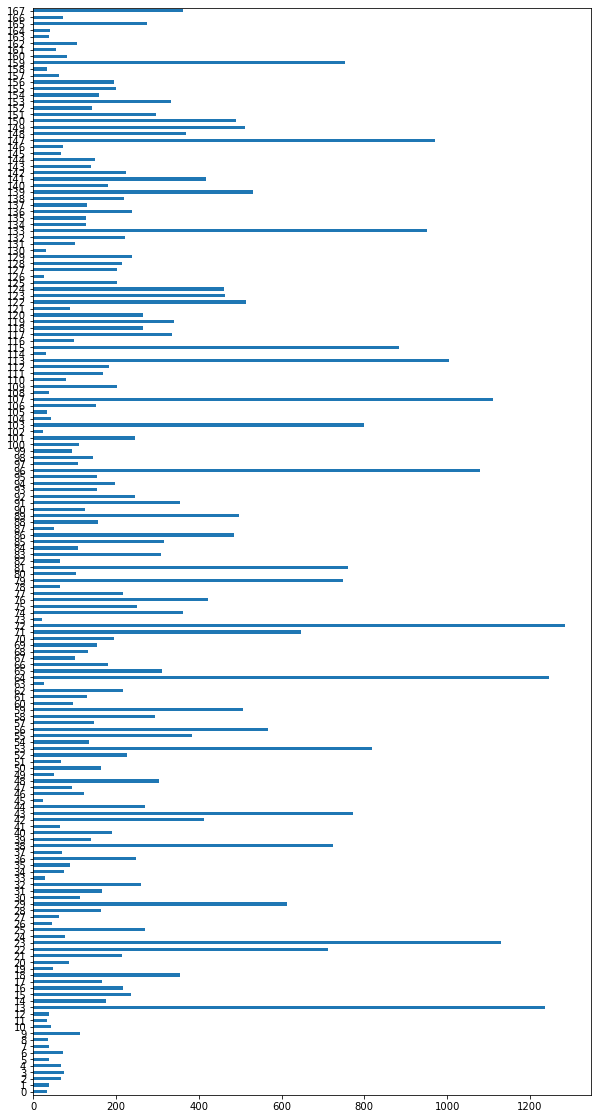

In [15]:
plt.figure(figsize=(10,20))
df_index_1['grapheme_root'].value_counts().sort_index().plot.barh()  

<AxesSubplot:>

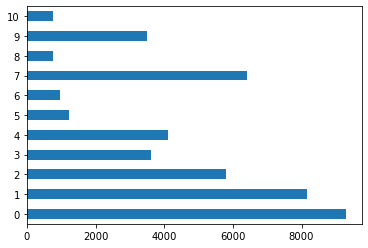

In [16]:
df_index_1['vowel_diacritic'].value_counts().sort_index().plot.barh()  

<AxesSubplot:>

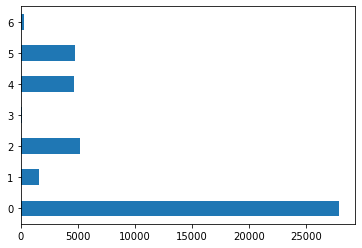

In [17]:
df_index_1['consonant_diacritic'].value_counts().sort_index().plot.barh()  

In [18]:
print(len(df_index_1['grapheme_root'].value_counts()))
df_index_1['grapheme_root'].value_counts()

168


72     1284
64     1247
13     1236
23     1129
107    1110
       ... 
63       27
126      26
45       24
102      24
73       22
Name: grapheme_root, Length: 168, dtype: int64

In [19]:
print(len(df_index_1['vowel_diacritic'].value_counts()))
df_index_1['vowel_diacritic'].value_counts()

11


0     9290
1     8159
7     6414
2     5813
4     4109
3     3613
9     3494
5     1220
6      951
8      769
10     765
Name: vowel_diacritic, dtype: int64

In [20]:
print(len(df_index_1['consonant_diacritic'].value_counts()))
df_index_1['consonant_diacritic'].value_counts() 

7


0    27933
2     5168
5     4784
4     4639
1     1641
6      293
3      139
Name: consonant_diacritic, dtype: int64

In [30]:
!ls


3_29_2021_dry_run_1.ipynb  3_30_2021_dry_run.ipynb  train.csv
3_29_2021_dry_run.ipynb    3_31_2021_dry_run.ipynb


In [21]:
df_shuffle = df_index_1.sample(frac=1) #shuffle

In [22]:
train = df_shuffle.iloc[:int(0.8*len(df_index_1)),:]
test = df_shuffle.iloc[int(0.8*len(df_index_1)):,:]

In [23]:
train.iloc[30415,:][3]

0

In [1]:
train.sample().shape

NameError: name 'train' is not defined

In [37]:
from PIL import Image 

def mygenerator(dataframe): # X = image, y = target
    while True:
        sample = dataframe.sample()
        TRAIN_DIR = '/home/beth/Galvanize/capstone/capstone_2/data/train/'
        image_name = TRAIN_DIR + sample['image_id'].values[0]
        image=Image.open(image_name)
        y=np.zeros(7)
        y[sample["consonant_diacritic"].values[0]]=1   
        X = np.array(image).astype(np.int32)
        y = y.astype(np.int32).reshape(1,7) 
#         X = np.array([X,X,X]).reshape(1,137,236,3)
        X = X.reshape(1,137,236,1)
        yield X,y
# infinite numbers of X and y    

In [38]:
X,y = next(mygenerator(train)) # randomly pick a row 

In [39]:
X.shape

(1, 137, 236, 1)

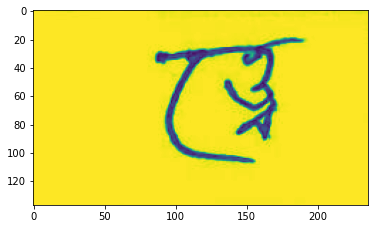

In [40]:
plt.imshow(X[0,:,:,0])

In [41]:
y

array([[1, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [42]:
# wanna try ResNet and AlexNet 3-31-2021

In [80]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 7, activation="relu", padding="valid", input_shape=(137,236,1)),#input shape: [rows, columns, channels]
    keras.layers.Conv2D(32, 3, activation="relu", padding="valid"),
    keras.layers.Conv2D(32, 3, activation="relu", padding="valid"), # <--------------------------
    keras.layers.MaxPooling2D(2),

    keras.layers.Conv2D(64, 3, activation="relu", padding="valid"),
    keras.layers.Conv2D(64, 3, activation="relu", padding="valid"),
    keras.layers.Conv2D(64, 3, activation="relu", padding="valid"), #<--------------------------
    keras.layers.MaxPooling2D(2),
    
    keras.layers.Conv2D(128, 3, activation="relu", padding="valid"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="valid"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="valid"), # <--------------------------
    keras.layers.MaxPooling2D(2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.3),     
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.3),      
    keras.layers.Dense(7, activation="softmax")
])

opt = keras.optimizers.Adam(learning_rate=0.0001)  # <--------------------------
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', keras.metrics.Recall()])

# Details/Retrospectives:
# - add more layers <--------------------------
# - did not Norm layers (not common anymore)
# - no data augmentation
# - dropout 0.3  
# - batch size 32 
# - no SGD Momentum 
# - Learning rate added <--------------------------
# - no L2 weight decay 5
# - no 7 CNN ensemble: 


In [81]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 131, 230, 32)      1600      
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 129, 228, 32)      9248      
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 127, 226, 32)      9248      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 63, 113, 32)       0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 61, 111, 64)       18496     
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 59, 109, 64)       36928     
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 57, 107, 64)      

In [82]:
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=100),
    keras.callbacks.TensorBoard(log_dir='./logs')]
#keras.callbacks.ModelCheckpoint(filepath='./checkpoint/model.{epoch:02d}-{val_loss:.2f}.h5')

history = model.fit(mygenerator(train),
                    epochs=75,
                    steps_per_epoch=64, #<------------
                    validation_data=mygenerator(test),
                    validation_steps=30, 
                    callbacks=my_callbacks)                 


Epoch 1/75
64/64 [==============================] - 9s 126ms/step - loss: 2.0538 - accuracy: 0.4098 - recall_9: 0.2428 - val_loss: 1.6744 - val_accuracy: 0.4667 - val_recall_9: 0.0000e+00
Epoch 2/75
64/64 [==============================] - 8s 120ms/step - loss: 1.6814 - accuracy: 0.3941 - recall_9: 0.0515 - val_loss: 1.4573 - val_accuracy: 0.5667 - val_recall_9: 0.5333
Epoch 3/75
64/64 [==============================] - 10s 149ms/step - loss: 1.7543 - accuracy: 0.6740 - recall_9: 0.4222 - val_loss: 1.4233 - val_accuracy: 0.6000 - val_recall_9: 0.6000
Epoch 4/75
64/64 [==============================] - 10s 150ms/step - loss: 2.0450 - accuracy: 0.4588 - recall_9: 0.3920 - val_loss: 1.5861 - val_accuracy: 0.5667 - val_recall_9: 0.0000e+00
Epoch 5/75
64/64 [==============================] - 10s 149ms/step - loss: 1.6343 - accuracy: 0.5027 - recall_9: 0.1480 - val_loss: 1.1843 - val_accuracy: 0.6000 - val_recall_9: 0.6000
Epoch 6/75
64/64 [==============================] - 10s 150ms/step - 

64/64 [==============================] - 9s 145ms/step - loss: 1.4168 - accuracy: 0.5561 - recall_9: 0.3664 - val_loss: 1.0017 - val_accuracy: 0.7333 - val_recall_9: 0.7333
Epoch 46/75
64/64 [==============================] - 9s 145ms/step - loss: 1.1718 - accuracy: 0.6081 - recall_9: 0.5156 - val_loss: 1.3015 - val_accuracy: 0.6000 - val_recall_9: 0.6000
Epoch 47/75
64/64 [==============================] - 9s 147ms/step - loss: 1.5375 - accuracy: 0.4553 - recall_9: 0.2070 - val_loss: 1.3566 - val_accuracy: 0.6000 - val_recall_9: 0.6000
Epoch 48/75
64/64 [==============================] - 9s 147ms/step - loss: 1.3288 - accuracy: 0.6684 - recall_9: 0.5245 - val_loss: 1.1566 - val_accuracy: 0.6667 - val_recall_9: 0.6667
Epoch 49/75
64/64 [==============================] - 9s 148ms/step - loss: 1.3109 - accuracy: 0.6121 - recall_9: 0.4662 - val_loss: 1.2061 - val_accuracy: 0.6667 - val_recall_9: 0.6000
Epoch 50/75
64/64 [==============================] - 10s 155ms/step - loss: 0.9098 - ac

In [88]:
score = model.evaluate(mygenerator(test), steps=200,verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])  # this is the one we care about

Test score: 1.173997402191162
Test accuracy: 0.6499999761581421


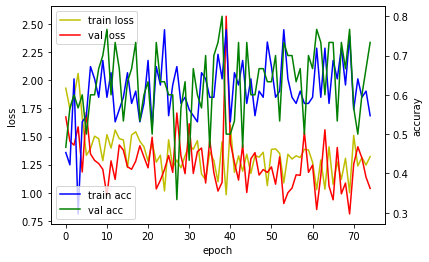

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


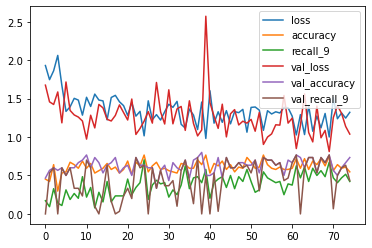

In [85]:
[plt.plot(history.history[i], label=i) for i in history.history.keys()]
plt.legend();

In [148]:
# confusion matrix
# from sklearn.metrics import confusion_matrix

# y_pred = model.predict(mygenerator(test),steps=200) # probability
# y_pred = np.argmax(y_pred, axis=1) # index of highest prob 
# y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

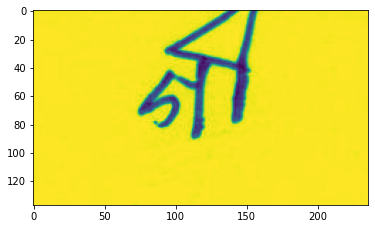

In [86]:
x,y= next(mygenerator(test))
x.shape
y.shape
plt.imshow(x[0,:,:,0])

In [87]:
prediction = [] 
actual = []
for x,y in mygenerator(test):
#     plt.imshow(x[0,:,:,0])
    actual.append(y.argmax())
    prediction.append(model.predict(x).argmax())
    if len(actual)>2000:
        break     

In [35]:
# actual

In [36]:
# prediction

In [54]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix')
multiclass=confusion_matrix(actual, prediction)
print(multiclass)

Confusion Matrix
[[1236    0    0    0    0    0    0]
 [  78    0    0    0    0    0    0]
 [ 253    0    0    0    0    0    0]
 [   4    0    0    0    0    0    0]
 [ 204    0    0    0    0    0    0]
 [ 211    0    0    0    0    0    0]
 [  15    0    0    0    0    0    0]]


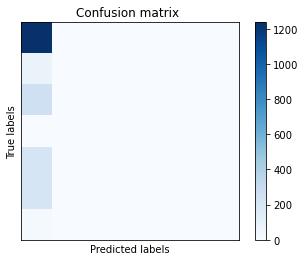

In [64]:
cm = confusion_matrix(actual, prediction)

plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()
